In [3]:
import pandas as pd



In [4]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.1/3.0 MB 1.6 MB/s eta 0:00:02
     -- ------------------------------------- 0.2/3.0 MB 2.4 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/3.0 MB 2.9 MB/s eta 0:00:01
     ------ --------------------------------- 0.5/3.0 MB 3.1 MB/s eta 0:00:01
     --------- ------------------------------ 0.7/3.0 MB 3.3 MB/s eta 0:00:01
     ---------- ----------------------------- 0.8/3.0 MB 3.2 MB/s eta 0:00:01
     ------------ --------------------------- 1.0/3.0 MB 3.6 MB/s eta 0:00:01
     --------------- ------------------------ 1.2/3.0 MB 3.6 MB/s eta 0:00:01
     ----------------- ---------------------- 1.4/3.0 MB 3.6 MB/s eta 0:00:01
     -------------------- ------------------- 1.5/3.0 MB 3.8 MB/s eta 0:00:01
     ---------------------- ----------------- 1.7/3.0 MB 3.8 MB/s eta 0


[notice] A new release of pip is available: 24.1.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


SyntaxError: invalid syntax (2350214200.py, line 1)

In [1]:
import yfinance as yf


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------- -------------------- 3.9/8.1 MB 19.5 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 16.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 14.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.7 MB 4.2 MB/s eta 0:00:01
   ----------------------------------- ---- 2.4/2.7 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 5.5 MB/s eta 0:00:00

   ----------------------------------

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
def fetch_data(ticker='AAPL', start='2020-01-01', end='2024-12-31'):
    data = yf.download(ticker, start=start, end=end)
    data = data[['Close']]
    data.dropna(inplace=True)
    return data


In [6]:
def apply_strategy(data, short_window=20, long_window=50):
    data['SMA20'] = data['Close'].rolling(window=short_window).mean()
    data['SMA50'] = data['Close'].rolling(window=long_window).mean()
    data.dropna(inplace=True)
    data['Position'] = 0
    data.loc[data['SMA20'] > data['SMA50'], 'Position'] = 1  # Buy signal
    data.loc[data['SMA20'] < data['SMA50'], 'Position'] = -1  # Sell signal
    data['Strategy_Returns'] = data['Position'].shift(1) * data['Close'].pct_change()
    data['Market_Returns'] = data['Close'].pct_change()
    return data

In [7]:
# Plot strategy performance
def plot_results(data):
    data['Cumulative_Strategy'] = (1 + data['Strategy_Returns']).cumprod()
    data['Cumulative_Market'] = (1 + data['Market_Returns']).cumprod()

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Cumulative_Strategy'], label='Strategy', color='blue')
    plt.plot(data.index, data['Cumulative_Market'], label='Market', color='gray')
    plt.title('Cumulative Returns: Strategy vs Market')
    plt.xlabel('Date')
    plt.ylabel('Growth of $1')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    df = fetch_data('AAPL')
    df = apply_strategy(df)
    plot_results(df)


C:\Users\Harsh\AppData\Local\Temp\ipykernel_21808\1147468340.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


ValueError: Cannot set a DataFrame with multiple columns to the single column Strategy_Returns

In [8]:
# Algo Trading Strategy Backtester (Intermediate Level)

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for a stock (e.g., Apple)
def fetch_data(ticker='AAPL', start='2020-01-01', end='2024-12-31'):
    data = yf.download(ticker, start=start, end=end)
    data = data[['Close']]
    data.dropna(inplace=True)
    return data

# Simple Moving Average Crossover Strategy
def apply_strategy(data, short_window=20, long_window=50):
    data['SMA20'] = data['Close'].rolling(window=short_window).mean()
    data['SMA50'] = data['Close'].rolling(window=long_window).mean()
    data.dropna(inplace=True)

    data['Position'] = 0
    data.loc[data['SMA20'] > data['SMA50'], 'Position'] = 1  # Buy signal
    data.loc[data['SMA20'] < data['SMA50'], 'Position'] = -1  # Sell signal
    data['Strategy_Returns'] = data['Position'].shift(1) * data['Close'].pct_change()
    data['Market_Returns'] = data['Close'].pct_change()
    return data

# Plot strategy performance
def plot_results(data):
    data['Cumulative_Strategy'] = (1 + data['Strategy_Returns']).cumprod()
    data['Cumulative_Market'] = (1 + data['Market_Returns']).cumprod()

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Cumulative_Strategy'], label='Strategy', color='blue')
    plt.plot(data.index, data['Cumulative_Market'], label='Market', color='gray')
    plt.title('Cumulative Returns: Strategy vs Market')
    plt.xlabel('Date')
    plt.ylabel('Growth of $1')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    df = fetch_data('AAPL')
    df = apply_strategy(df)
    plot_results(df)


C:\Users\Harsh\AppData\Local\Temp\ipykernel_21808\578169868.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


ValueError: Cannot set a DataFrame with multiple columns to the single column Strategy_Returns

C:\Users\Harsh\AppData\Local\Temp\ipykernel_21808\658414908.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


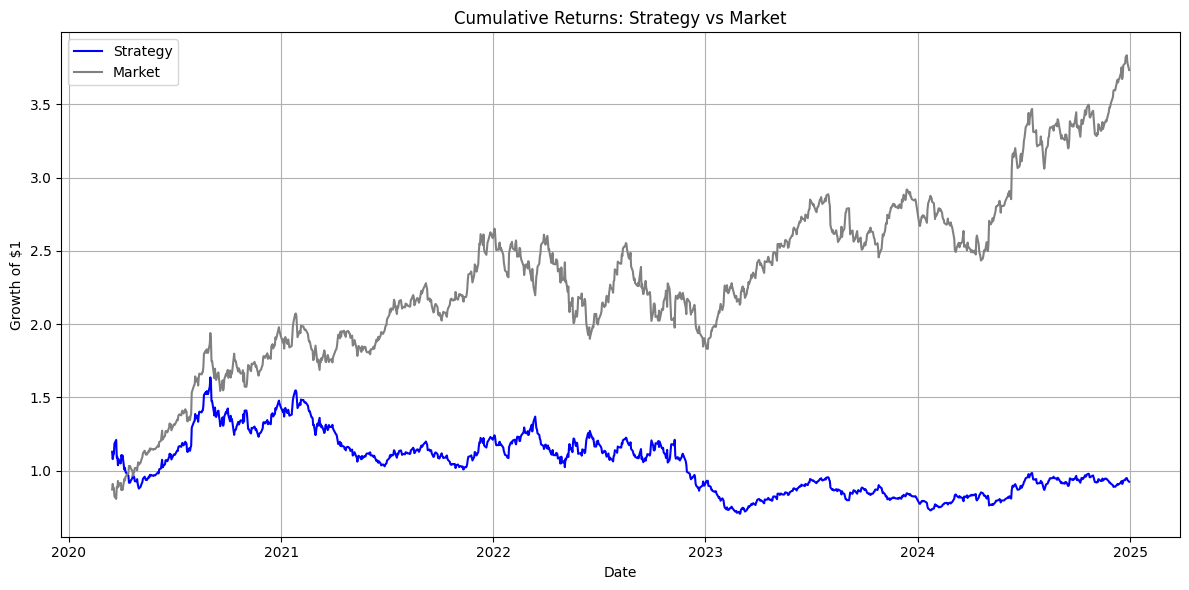

In [9]:
# Algo Trading Strategy Backtester (Intermediate Level)

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for a stock (e.g., Apple)
def fetch_data(ticker='AAPL', start='2020-01-01', end='2024-12-31'):
    data = yf.download(ticker, start=start, end=end)
    data = data[['Close']]
    data.dropna(inplace=True)
    return data

# Simple Moving Average Crossover Strategy
def apply_strategy(data, short_window=20, long_window=50):
    data['SMA20'] = data['Close'].rolling(window=short_window).mean()
    data['SMA50'] = data['Close'].rolling(window=long_window).mean()
    data.dropna(inplace=True)

    data['Position'] = 0
    data.loc[data['SMA20'] > data['SMA50'], 'Position'] = 1  # Buy signal
    data.loc[data['SMA20'] < data['SMA50'], 'Position'] = -1  # Sell signal

    # Calculate daily returns
    data['Daily_Return'] = data['Close'].pct_change()

    # Apply strategy returns based on shifted position
    data['Strategy_Returns'] = data['Position'].shift(1) * data['Daily_Return']
    data['Market_Returns'] = data['Daily_Return']

    return data

# Plot strategy performance
def plot_results(data):
    data['Cumulative_Strategy'] = (1 + data['Strategy_Returns']).cumprod()
    data['Cumulative_Market'] = (1 + data['Market_Returns']).cumprod()

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Cumulative_Strategy'], label='Strategy', color='blue')
    plt.plot(data.index, data['Cumulative_Market'], label='Market', color='gray')
    plt.title('Cumulative Returns: Strategy vs Market')
    plt.xlabel('Date')
    plt.ylabel('Growth of $1')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    df = fetch_data('AAPL')
    df = apply_strategy(df)
    plot_results(df)


C:\Users\Harsh\AppData\Local\Temp\ipykernel_21808\2458254564.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Sharpe Ratio: 0.10
Max Drawdown: -56.89%


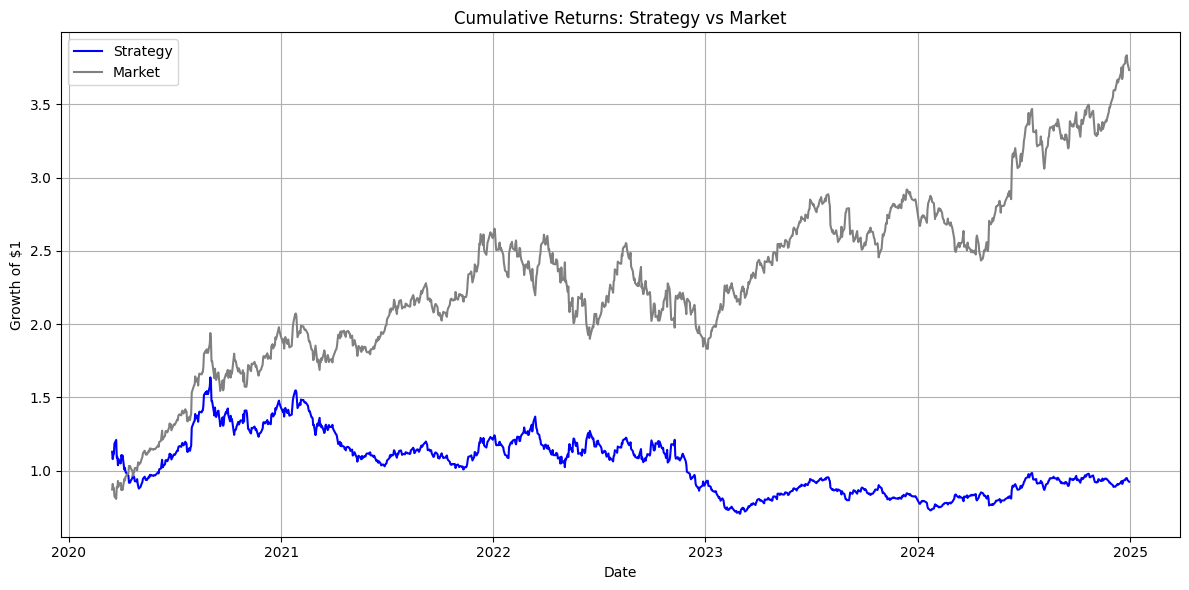

'\nREADME.md\n=========\n\n# 📈 Algo Trading Strategy Backtester\n\nThis project implements a simple **Moving Average Crossover Strategy** to backtest trading signals on historical stock data using Python.\n\n## 🔧 Features\n- SMA(20) / SMA(50) crossover signals\n- Strategy vs Market return comparison\n- Sharpe Ratio & Maximum Drawdown calculation\n- Visualization of cumulative returns\n\n## 📚 Requirements\n- `yfinance`\n- `pandas`\n- `matplotlib`\n- `numpy`\n\nInstall dependencies with:\n```bash\npip install yfinance pandas matplotlib numpy\n```\n\n## 📊 How It Works\n- **Buy** when 20-day SMA > 50-day SMA\n- **Sell** when 20-day SMA < 50-day SMA\n- Calculate daily returns based on signal\n- Evaluate strategy performance vs. market\n\n## 📈 Output\n- Line chart of cumulative returns\n- Risk metrics:\n  - Sharpe Ratio\n  - Max Drawdown\n\n## 🧠 Author\nBuilt as part of quant trading preparation for risk management internship roles.\n'

In [11]:
# Algo Trading Strategy Backtester (Intermediate Level)

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Download historical data for a stock (e.g., Apple)
def fetch_data(ticker='AAPL', start='2020-01-01', end='2024-12-31'):
    data = yf.download(ticker, start=start, end=end)
    data = data[['Close']]
    data.dropna(inplace=True)
    return data

# Simple Moving Average Crossover Strategy
def apply_strategy(data, short_window=20, long_window=50):
    data['SMA20'] = data['Close'].rolling(window=short_window).mean()
    data['SMA50'] = data['Close'].rolling(window=long_window).mean()
    data.dropna(inplace=True)

    data['Position'] = 0
    data.loc[data['SMA20'] > data['SMA50'], 'Position'] = 1  # Buy signal
    data.loc[data['SMA20'] < data['SMA50'], 'Position'] = -1  # Sell signal

    # Calculate daily returns
    data['Daily_Return'] = data['Close'].pct_change()

    # Apply strategy returns based on shifted position
    data['Strategy_Returns'] = data['Position'].shift(1) * data['Daily_Return']
    data['Market_Returns'] = data['Daily_Return']

    return data

# Calculate risk metrics like Sharpe ratio and Max Drawdown
def calculate_risk_metrics(data):
    sharpe_ratio = np.mean(data['Strategy_Returns']) / np.std(data['Strategy_Returns']) * np.sqrt(252)

    cumulative_returns = (1 + data['Strategy_Returns']).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()

    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown:.2%}")

# Plot strategy performance
def plot_results(data):
    data['Cumulative_Strategy'] = (1 + data['Strategy_Returns']).cumprod()
    data['Cumulative_Market'] = (1 + data['Market_Returns']).cumprod()

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Cumulative_Strategy'], label='Strategy', color='blue')
    plt.plot(data.index, data['Cumulative_Market'], label='Market', color='gray')
    plt.title('Cumulative Returns: Strategy vs Market')
    plt.xlabel('Date')
    plt.ylabel('Growth of $1')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    df = fetch_data('AAPL')
    df = apply_strategy(df)
    calculate_risk_metrics(df)
    plot_results(df)

"""
README.md
=========

# 📈 Algo Trading Strategy Backtester

This project implements a simple **Moving Average Crossover Strategy** to backtest trading signals on historical stock data using Python.

## 🔧 Features
- SMA(20) / SMA(50) crossover signals
- Strategy vs Market return comparison
- Sharpe Ratio & Maximum Drawdown calculation
- Visualization of cumulative returns

## 📚 Requirements
- `yfinance`
- `pandas`
- `matplotlib`
- `numpy`

Install dependencies with:
```bash
pip install yfinance pandas matplotlib numpy
```

## 📊 How It Works
- **Buy** when 20-day SMA > 50-day SMA
- **Sell** when 20-day SMA < 50-day SMA
- Calculate daily returns based on signal
- Evaluate strategy performance vs. market

## 📈 Output
- Line chart of cumulative returns
- Risk metrics:
  - Sharpe Ratio
  - Max Drawdown

## 🧠 Author
Built as part of quant trading preparation for risk management internship roles.
"""
